In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import datetime
import xarray
from matplotlib.colors import Normalize
from mpas_xarray import preprocess_mpas, remove_repeated_time_index
from scipy import signal

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10) # Large figures
dpi=200;

Populating the interactive namespace from numpy and matplotlib


In [2]:
### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [3]:
dsM = xarray.open_mfdataset('/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.0002-01-01_00000.nc')

In [6]:
lonmin = 170.0 * np.pi / 180.
lonmax = 270.0 * np.pi / 180.
latmin = -1.0 * np.pi / 180.
latmax = 1.0 * np.pi / 180.

lonv = dsM.lonCell[:].values
latv = dsM.latCell[:].values

In [16]:
# strip small variables for later
import os
import glob
import shutil
import subprocess

sys.path.insert(0,'/lcrc/group/acme/lvanroe/conda/bin')
varnamesF = ['timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgWindStressZonal,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgBoundaryLayerDepth,',\
             'timeMonthly_avg_avgValueWithinOceanRegion_avgRainFlux,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgShortWaveHeatFlux,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxDown,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgSensibleHeatFlux,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxUp,', \
             'timeMonthly_avg_avgValueWithinOceanRegion_avgLatentHeatFlux']
        
varnames = ' '.join(varnamesF).replace(' ','')
fn = glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.00[0-2][0-9]*.nc')
if not os.path.isdir('/lcrc/group/acme/lvanroe/subsetFilesSmall'):
    os.mkdir('/lcrc/group/acme/lvanroe/subsetFilesSmall')
#else:
#    shutil.rmtree('/lcrc/group/acme/lvanroe/subsetFilesSmall', ignore_errors=True)
#    os.mkdir('/lcrc/group/acme/lvanroe/subsetFilesSmall')
for i,fname in enumerate(sorted(fn)):
    tagSpot = fname.find('Monthly') + len('Monthly')
    tag = fname[tagSpot:]
    outfile = '/lcrc/group/acme/lvanroe/subsetFilesSmall/smallStuff'+tag
    if not os.path.isfile(outfile):
        args = ['ncks','-d','nVertLevels,0','-v',varnames,fname,outfile]
        subprocess.check_call(args)
        print fname

In [9]:
# strip small variables for later
import os
import glob
import shutil
import subprocess

sys.path.insert(0,'/lcrc/group/acme/lvanroe/conda/bin')
varnamesF = ['timeMonthly_avg_dThreshMLD']
        
varnames = ' '.join(varnamesF).replace(' ','')
fn = glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.00[0-9]*.nc')
if not os.path.isdir('/lcrc/group/acme/lvanroe/subsetFilesSmall'):
    os.mkdir('/lcrc/group/acme/lvanroe/subsetFilesSmall')
#else:
#    shutil.rmtree('/lcrc/group/acme/lvanroe/subsetFilesSmall', ignore_errors=True)
#    os.mkdir('/lcrc/group/acme/lvanroe/subsetFilesSmall')
for i,fname in enumerate(sorted(fn)):
    tagSpot = fname.find('Monthly') + len('Monthly')
    tag = fname[tagSpot:]
    outfile = '/lcrc/group/acme/lvanroe/subsetFilesSmall/mldStuff'+tag
    if not os.path.isfile(outfile):
        args = ['ncks','-d','nVertLevels,0','-v',varnames,fname,outfile]
        subprocess.check_call(args)
        print fname

/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-01-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-02-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-03-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-04-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-05-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-06-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-07-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oEC

KeyboardInterrupt: 

In [ ]:
dsMLD = xarray.open_mfdataset('/lcrc/group/acme/lvanroe/subsetFilesSmall/mldStuff.*',concat_dim='Time')

In [11]:
ds = xarray.open_mfdataset('/lcrc/group/acme/lvanroe/subsetFilesSmall/smallStuff.*.nc',concat_dim='Time')

In [12]:
# Compute Std Dev in Nino3 region
nin3 = ds.timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature[:,3].values
nin3dtrd = signal.detrend(nin3)
print 'nino3 std dev = ',np.std(nin3dtrd)

# Compute Std Dev in Nino4 region
nin4 = ds.timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature[:,4].values
nin4dtrd = signal.detrend(nin4)
print 'nino4 std dev = ',np.std(nin4dtrd)

# Compute Std Dev of precip in Nino4 region
nin3p = ds.timeMonthly_avg_avgValueWithinOceanRegion_avgRainFlux[:,4].values*86400
nin3pdtrd = signal.detrend(nin3p)
print 'nino4 precip std dev = ',np.std(nin3pdtrd)

nino3 std dev =  1.40485483155
nino4 std dev =  0.799090944117
nino4 precip std dev =  1.32386656041


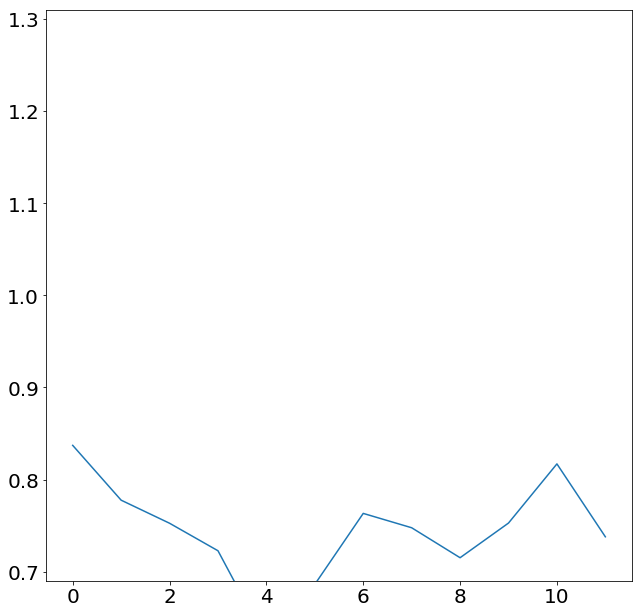

In [13]:
# monthly standard deviation of nino3
# need to group by months
stdDev = np.zeros(12)

for i in range(12):
    stdDev[i] = np.std(nin3dtrd[i::12])

# Seasonality metric
plt.plot(stdDev)
plt.ylim(0.69,1.31)
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

In [14]:
NDJ = np.std(np.hstack([nin3dtrd[11::12],nin3dtrd[::12],nin3dtrd[10::12]]))
MAM = np.std(np.hstack([nin3dtrd[2::12],nin3dtrd[3::12],nin3dtrd[4::12]]))

print 'seasonality metric is = ', NDJ/MAM

seasonality metric is =  1.3186856964


In [17]:
#sys.path.insert(0,'/global/homes/z/zender/bin_edison')
varnamesF = ['timeMonthly_avg_activeTracers_temperature,', \
             'timeMonthly_avg_windStressZonal,', \
             'timeMonthly_avg_rainFlux,', \
             'timeMonthly_avg_shortWaveHeatFlux,', \
             'timeMonthly_avg_longWaveHeatFluxDown,', \
             'timeMonthly_avg_sensibleHeatFlux,', \
             'timeMonthly_avg_longWaveHeatFluxUp,', \
             'timeMonthly_avg_latentHeatFlux']

varnames = ' '.join(varnamesF).replace(' ','')
if not os.path.isdir('/lcrc/group/acme/lvanroe/subsetFilesFull'):
    os.mkdir('/lcrc/group/acme/lvanroe/subsetFilesFull')
#else:
#    shutil.rmtree('/global/cscratch1/sd/lvroekel/subsetFilesFull', ignore_errors=True)
#    os.mkdir('/global/cscratch1/sd/lvroekel/subsetFilesFull')
for i,fname in enumerate(sorted(fn)):
    tagSpot = fname.find('Monthly') + len('Monthly')
    tag = fname[tagSpot:]
    outfile = '/lcrc/group/acme/lvanroe/subsetFilesFull/fullStuff'+tag
    if not os.path.isfile(outfile):
        args = ['ncks','-O','-d','nVertLevels,0','-v',varnames,fname,outfile]
        subprocess.check_call(args)
        print fname

/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-02-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-03-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-04-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-05-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-06-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-07-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001-08-01.nc
/lcrc/group/acme/jwolfe/acme_scratch/2017

In [18]:
dsF = xarray.open_mfdataset('/lcrc/group/acme/lvanroe/subsetFilesFull/fullStuff.0*.nc',concat_dim='Time')

In [19]:
dsF.timeMonthly_avg_activeTracers_temperature.shape

(348, 235160, 1)

In [20]:
lonmin = 150.0 * np.pi / 180.
lonmax = 270.0 * np.pi / 180.
latmin = -5.0 * np.pi / 180.
latmax = 5.0 * np.pi / 180.

lonv = dsM.lonCell[:].values
latv = dsM.latCell[:].values

indEq = np.where((lonv > lonmin) & (lonv < lonmax) & (latv < latmax) & (latv > latmin))[0]

In [60]:
indEq[:10]

array([  7,   9,  12,  39,  44,  48,  70,  88, 106, 123])

In [21]:
nin34 = ds.timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature[:,5].values
nin34dtrd = signal.detrend(nin34)


In [22]:
#compute nino34 index to sort values (rough)
indsEN = np.where(nin34dtrd> 0.5)[0]
ENMax = np.zeros(len(indsEN))
eventNum = np.zeros(len(indsEN))
eventCtr = 0
counter = -1
for i,indvs in enumerate(indsEN):
    if indvs == counter+1:
        eventNum[i] = eventCtr
        counter += 1
    else:
        counter = indvs
        eventCtr += 1
        eventNum[i] = eventCtr
        
    position = dsF.timeMonthly_avg_activeTracers_temperature[indvs,indEq,0].argmax().values
    ENMax[i] = lonv[indEq[position]]*180/np.pi

In [23]:
#compute nino34 index to sort values (rough)
indsLN = np.where(nin34dtrd < -0.5)[0]
LNMax = np.zeros(len(indsLN))
LNeventNum = np.zeros(len(indsLN))
LNeventCtr = 0
counter = -1
for i,indvs in enumerate(indsLN):
    if indvs == counter+1:
        LNeventNum[i] = LNeventCtr
        counter += 1
    else:
        counter = indvs
        LNeventCtr += 1
        LNeventNum[i] = eventCtr
        
    position = dsF.timeMonthly_avg_activeTracers_temperature[indvs,indEq,0].argmin().values
    LNMax[i] = lonv[indEq[position]]*180/np.pi

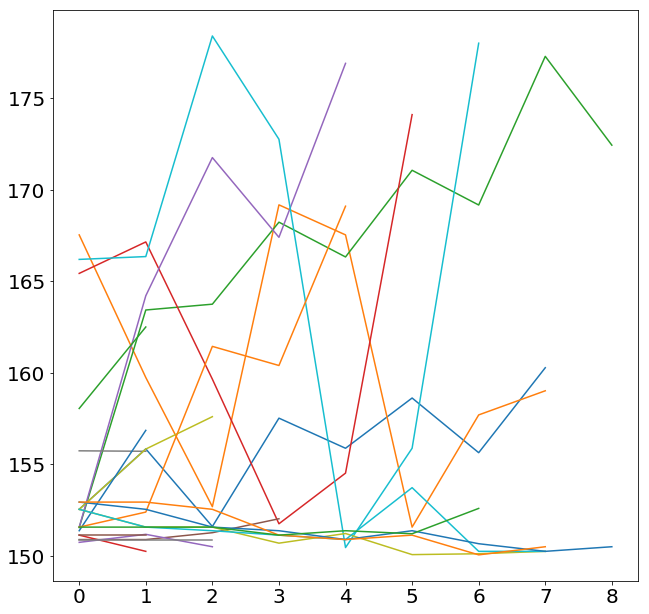

In [24]:
for i in range(int(eventNum.max())):
    spots = np.where(eventNum==i)
    plt.plot(ENMax[spots])
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)

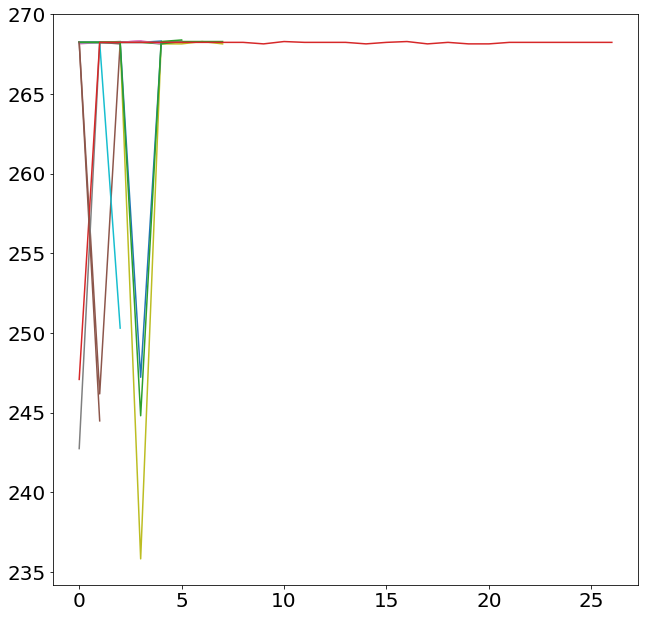

In [25]:
for i in range(int(LNeventNum.max())):
    spots = np.where(LNeventNum==i)
    plt.plot(LNMax[spots])
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)

In [26]:
#Fig 6, tropical avg temp and wind
dsEqM = dsM.sel(nCells = indEq)

In [27]:
nBinsLatitude = 125

#Prepare an index dictionary for averaging in zonal direction
binEdgeLat = np.linspace(lonmin,lonmax,nBinsLatitude+1)

meshData = dsEqM.update({'lonCell':dsEqM.lonCell})
meshData = meshData.set_coords('lonCell')

gbobj = meshData.lonCell.groupby_bins('lonCell',binEdgeLat,right=True)
binningDict = gbobj.groups

In [28]:
binCenterLatitude = np.zeros(nBinsLatitude);
for k in range(len(binCenterLatitude)):
    binCenterLatitude[k] = 0.5*(binEdgeLat[k] + binEdgeLat[k+1])

#add an index to match the binning Dictionary for appropriate placement of column average
for key,value in binningDict.iteritems():
    stemp = key[1:-1].replace(',',' ').split()
    latsearch = 0.5*(float(stemp[0]) + float(stemp[1]))

    spot = abs(binCenterLatitude - latsearch).argmin()

    binningDict[key] = (spot,binningDict[key])

In [29]:
def bin_fields2(sortingDict, fieldin, nlats, nlevs):

    fieldout = np.zeros((nlats,nlevs))
    for key,value in sortingDict.iteritems():
        fieldout[sortingDict[key][0]] = np.nanmean(fieldin[sortingDict[key][1]],axis=0)
    return fieldout

In [30]:
temps= dsF.timeMonthly_avg_activeTracers_temperature[:,indEq,0].values
winds = dsF.timeMonthly_avg_windStressZonal[:,indEq].values

In [31]:
nt = len(dsF.Time.values)
interpedSST = np.zeros((nt,nBinsLatitude))
interpedWND = np.zeros((nt,nBinsLatitude))
for i in range(nt):
    interpedSST[i,:] = bin_fields2(binningDict, temps[i,:], nBinsLatitude, 1)[:,0] 
    interpedWND[i,:] = bin_fields2(binningDict, winds[i,:], nBinsLatitude, 1)[:,0] 
        

In [32]:
rain = dsF.timeMonthly_avg_rainFlux[:,indEq].values
nt = rain.shape[0]
interpedRain = np.zeros((nt,nBinsLatitude))
for i in range(nt):
    interpedRain[i,:] = bin_fields2(binningDict, rain[i,:], nBinsLatitude, 1)[:,0] 

In [33]:
mlds = dsMLD.timeMonthly_avg_dThreshMLD[:,indEq].values

NameError: name 'dsMLD' is not defined

In [ ]:
nt = len(dsMLD.Time.values)
interpedMLD = np.zeros((nt,nBinsLatitude))
for i in range(nt):
    interpedMLD[i,:] = bin_fields2(binningDict, mlds[i,:], nBinsLatitude, 1)[:,0] 

In [ ]:
plt.plot(binCenterLatitude*180/np.pi,interpedMLD.mean(axis=0))
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
#plt.ylim(22.9,30.1)

In [34]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

(22.9, 30.1)

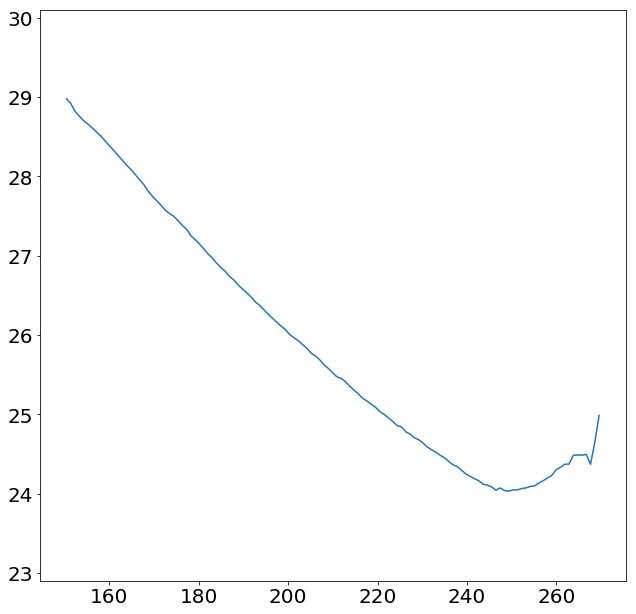

In [35]:
plt.plot(binCenterLatitude*180/np.pi,interpedSST.mean(axis=0))
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.ylim(22.9,30.1)

In [23]:
n1

1560

In [37]:
yr1 = 20
yr2 = 29
times = np.arange(yr1,yr2,1./12.)
n1=yr1*12
n2=yr2*12

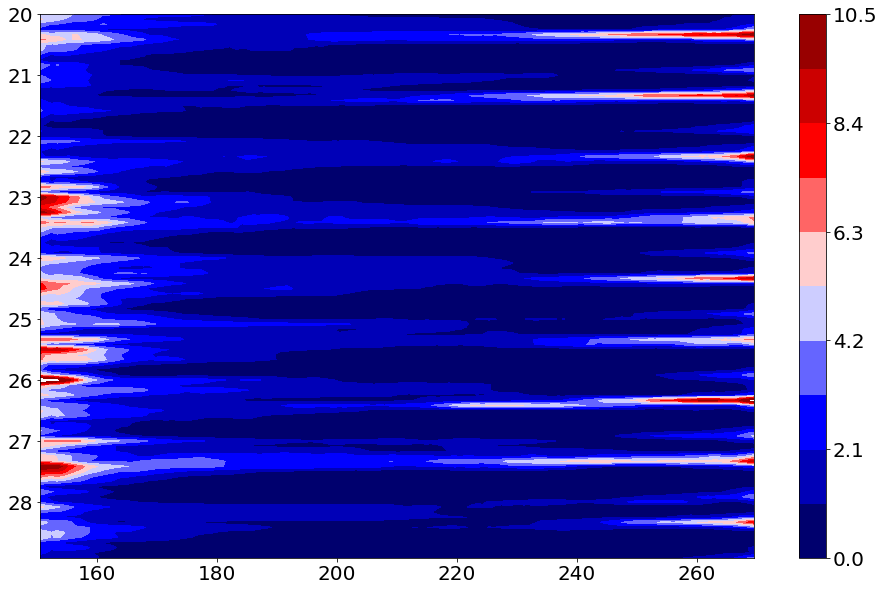

In [38]:
n1=yr1*12
n2=yr2*12
plt.contourf(binCenterLatitude*180/np.pi,times,interpedRain[n1:n2,:]*86400,cmap='seismic',levels=np.linspace(0,10.5,11))
plt.colorbar()
plt.gca().invert_yaxis()

In [39]:
#sst anomalies
meanVals = np.ones((12,nBinsLatitude))
for i in range(12):
    meanVals[i,:] = interpedRain[i::12,:].mean(axis=0)

anomPrecip = np.zeros_like(interpedRain)
for i in range(nt):
    ispot = np.mod(i,11)
    anomPrecip[i,:] = interpedRain[i,:] - meanVals[ispot,:]

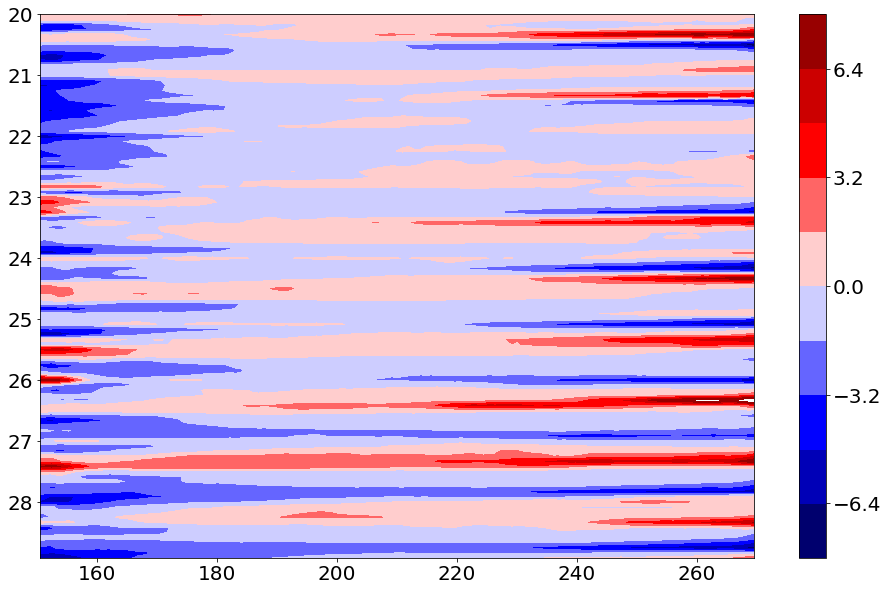

In [40]:
norm = MidpointNormalize(midpoint=0)
plt.contourf(binCenterLatitude*180./np.pi,times,anomPrecip[n1:n2,:]*86400,norm=norm,cmap='seismic',levels=np.linspace(-8,8,11))
plt.colorbar()
plt.gca().invert_yaxis()

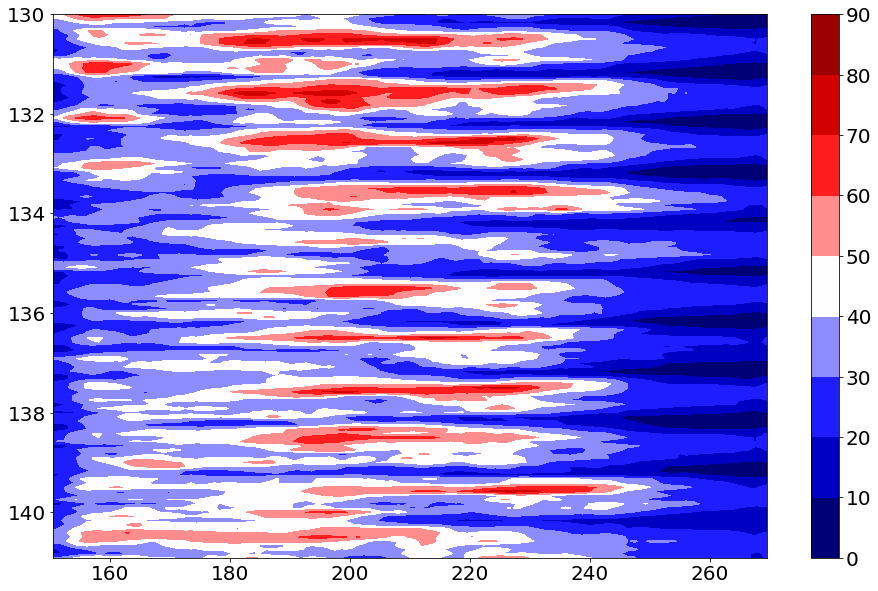

In [49]:
n1=yr1*12
n2=yr2*12
plt.contourf(binCenterLatitude*180/np.pi,times,interpedMLD[n1:n2,:],levels=np.linspace(0,90,10),cmap='seismic')
plt.colorbar()
plt.gca().invert_yaxis()

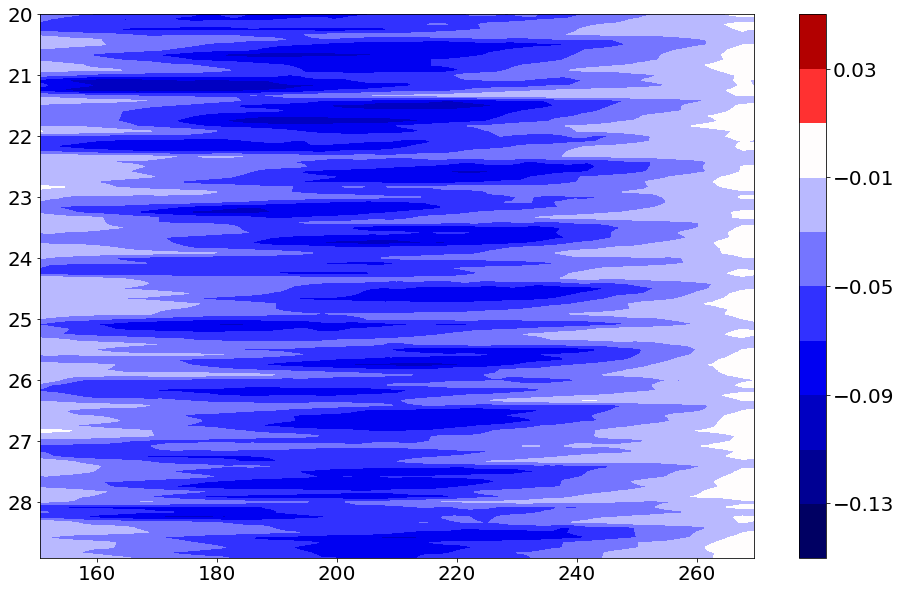

In [41]:
n1=yr1*12
n2=yr2*12
norm = MidpointNormalize(midpoint=0)
plt.contourf(binCenterLatitude*180/np.pi,times,interpedWND[n1:n2,:],cmap='seismic',norm=norm,levels=np.linspace(-0.15,0.05,11))
plt.colorbar()
plt.gca().invert_yaxis()

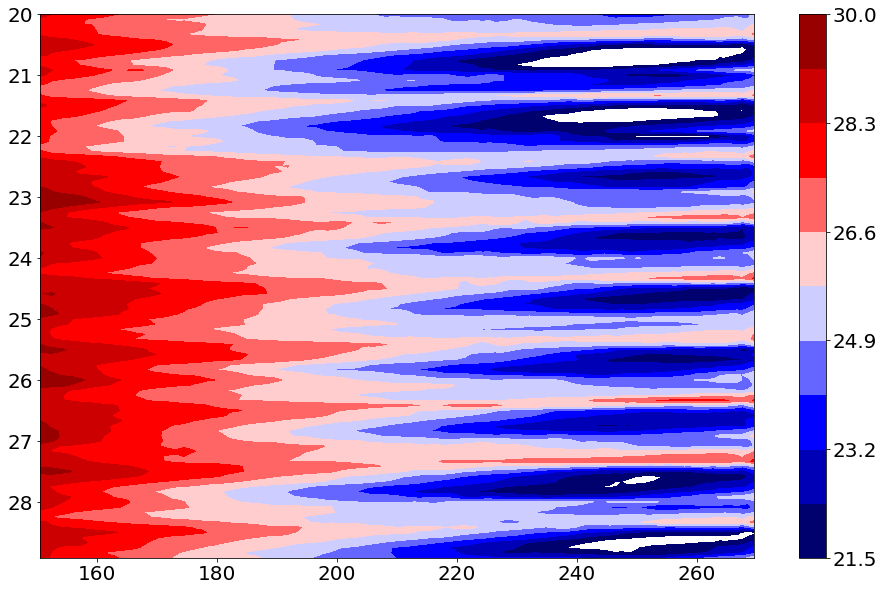

In [42]:

plt.contourf(binCenterLatitude*180/np.pi,times,interpedSST[n1:n2,:],cmap='seismic',levels=np.linspace(21.5,30,11))
plt.colorbar()
plt.gca().invert_yaxis()

In [53]:
#sst anomalies
meanVals = np.ones((12,nBinsLatitude))
for i in range(12):
    meanVals[i,:] = interpedMLD[i::12,:].mean(axis=0)

anomMLD = np.zeros_like(interpedMLD)
for i in range(nt):
    ispot = np.mod(i,11)
    anomMLD[i,:] = interpedMLD[i,:] - meanVals[ispot,:]

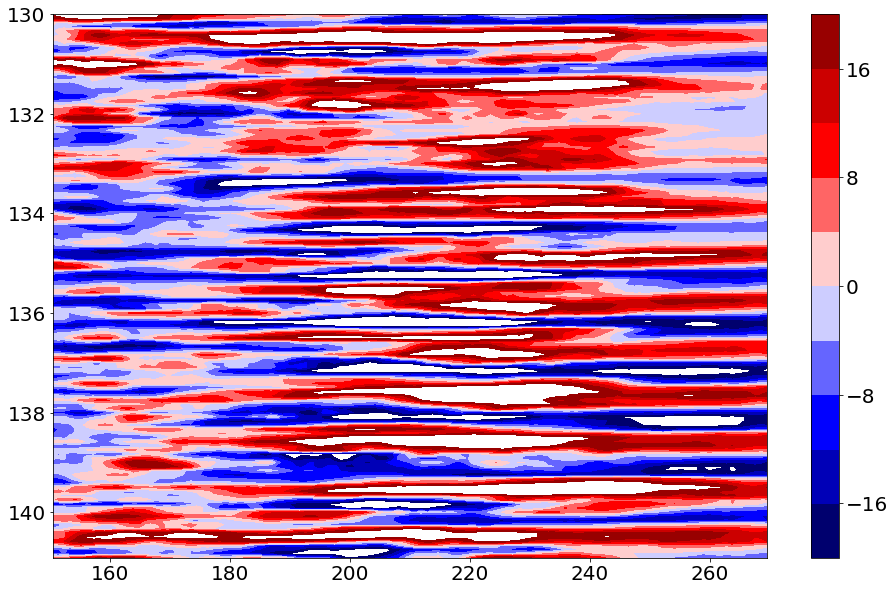

In [54]:
norm = MidpointNormalize(midpoint=0)
plt.contourf(binCenterLatitude*180./np.pi,times,anomMLD[n1:n2,:],cmap='seismic',norm=norm,levels=np.linspace(-20,20,11))
plt.colorbar()
plt.gca().invert_yaxis()

In [38]:
dsFs = dsF.isel(nCells=indEq)

In [16]:
dsWS.timeMonthly_avg_activeTracers_temperature.shape

(2387, 19108, 37)

In [20]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0[0-1]*-*-01.nc'
dsWS = xarray.open_mfdataset(infiles, preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], \
                                                                    onlyvars=['timeMonthly_avg_activeTracers_temperature'],
                                                                          iselvals={'nCells':indEq,'nVertLevels':range(37)}))
dsWS = remove_repeated_time_index(dsWS)

In [21]:
# hacky code to find 20C isotherm
nC = dsWS.dims['nCells']
nV = dsWS.dims['nVertLevels']
nt = len(dsWS.Time)
vals = abs(np.ones((nt,nC,nV))*20-dsWS.timeMonthly_avg_activeTracers_temperature[:,:,:]).argmin(axis=2)

MemoryError: 

In [ ]:
depVals = np.ones((nt,nC))
indVals = vals.values

In [ ]:
zm = dsEqM.zMid.values
for i in range(nt):
    for j in range(nC):
        depVals[i,j] = zm[0,j,indVals[i,j]]

In [ ]:
meanVals = np.ones((12,nC))
for i in range(12):
    meanVals[i,:] = depVals[i::12,:].mean(axis=0)

In [ ]:
anoms20c = np.zeros_like(depVals)
for i in range(nt):
    ispot = np.mod(i,11)
    anoms20c[i,:] = depVals[i,:] - meanVals[ispot,:]

In [ ]:
interped20c = np.zeros((nt,nBinsLatitude))
for i in range(nt):
    interped20c[i,:] = bin_fields2(binningDict, anoms20c[i,:], nBinsLatitude, 1)[:,0] 

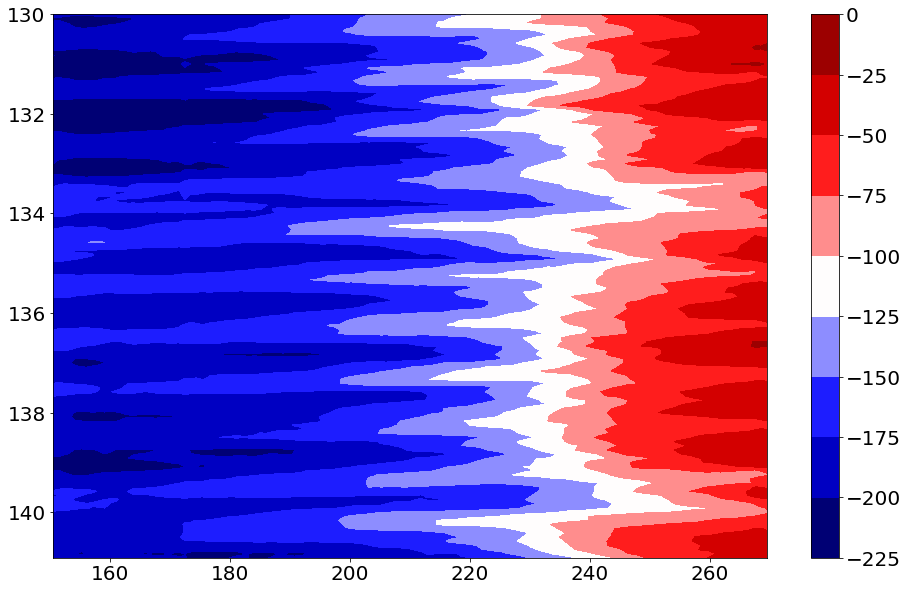

In [35]:

plt.contourf(binCenterLatitude*180./np.pi,times,interped20c[n1:n2,:],cmap='seismic')
plt.colorbar()
plt.gca().invert_yaxis()

In [19]:
plt.contourf(binCenterLatitude*180./np.pi,times,interped20c[n1:n2,:],cmap='seismic',levels=np.linspace(-75,45,11))
plt.colorbar()
plt.gca().invert_yaxis()

NameError: name 'interped20c' is not defined

In [85]:
#sst anomalies
meanVals = np.ones((12,nBinsLatitude))
for i in range(12):
    meanVals[i,:] = interpedSST[i::12,:].mean(axis=0)

In [86]:
anomSST = np.zeros_like(interpedSST)
for i in range(nt):
    ispot = np.mod(i,11)
    anomSST[i,:] = interpedSST[i,:] - meanVals[ispot,:]

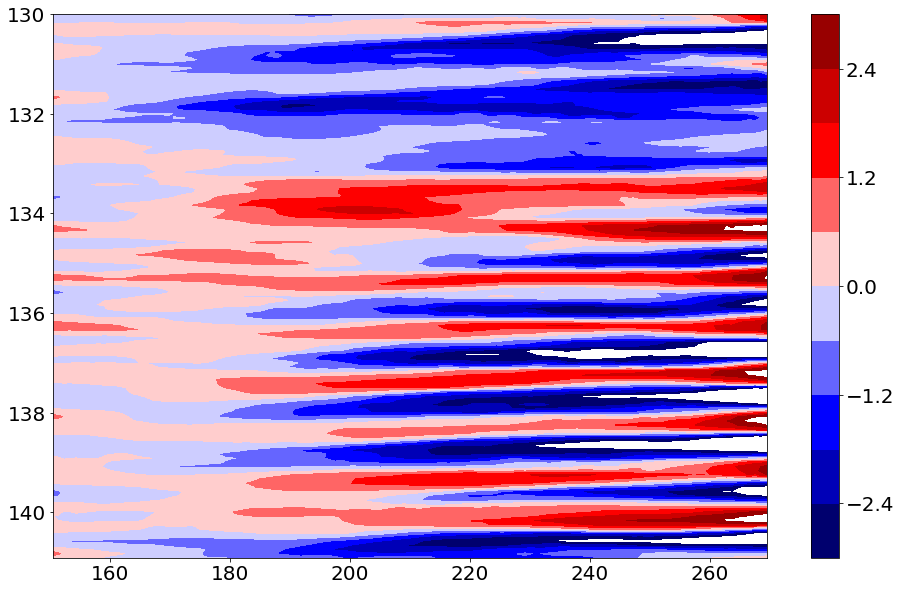

In [87]:

plt.contourf(binCenterLatitude*180./np.pi,times,anomSST[n1:n2,:],cmap='seismic',levels=np.linspace(-3,3,11))
plt.colorbar()
plt.gca().invert_yaxis()

In [55]:
# wind anomalies

meanVals = np.ones((12,nBinsLatitude))
for i in range(12):
    meanVals[i,:] = interpedWND[i::12,:].mean(axis=0)
    
anomWND = np.zeros_like(interpedWND)
for i in range(nt):
    ispot = np.mod(i,11)
    anomWND[i,:] = interpedWND[i,:] - meanVals[ispot,:]

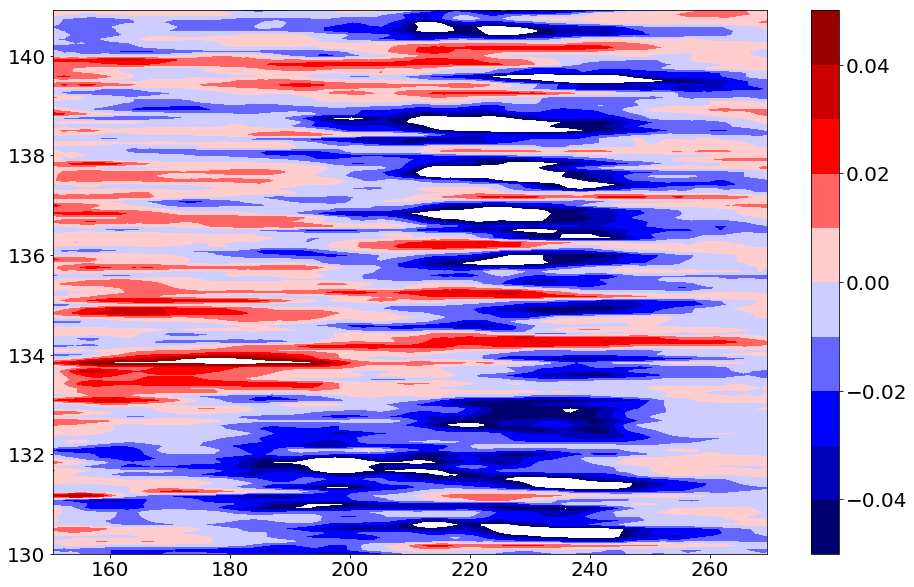

In [56]:
norm = MidpointNormalize(midpoint=0)
plt.contourf(binCenterLatitude*180./np.pi,times,anomWND[n1:n2,:],norm=norm,cmap='seismic',levels=np.linspace(-.05,.05,11))
plt.colorbar()

(-6.01, 2.05)

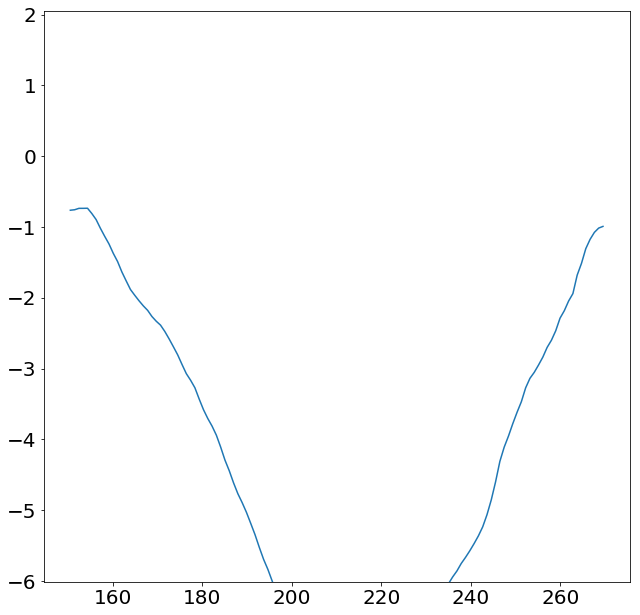

In [57]:
plt.plot(binCenterLatitude*180/np.pi,interpedWND.mean(axis=0)*100)
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.ylim(-6.01,2.05)

In [27]:
# SW anomalies vs Nino 3 anomalies

sw = ds.timeMonthly_avg_avgValueWithinOceanRegion_avgShortWaveHeatFlux[:,3].values
swA = signal.detrend(sw)

In [28]:
inds0 = np.where(nin3dtrd < 0)[0]
indsP = np.where(nin3dtrd > 0)[0]
fit0 = np.polyfit(nin3dtrd[inds0],swA[inds0],1)
fitP = np.polyfit(nin3dtrd[indsP],swA[indsP],1)

In [29]:
x0 = np.linspace(-5,0,25)
sw0 = fit0[1] + fit0[0]*x0
xP = np.linspace(0,5,25)
swP = fitP[1] + fitP[0]*xP

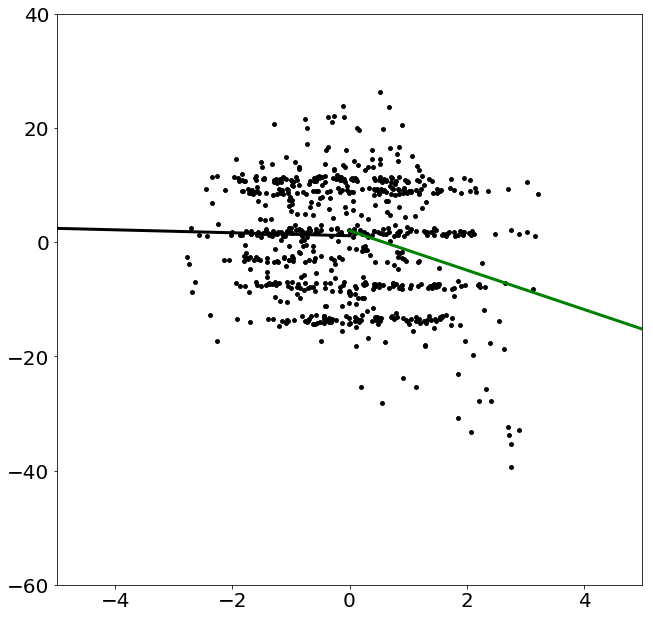

In [30]:
plt.scatter(nin3dtrd,swA,s=15,c='k')
plt.plot(x0,sw0,'k',linewidth=3)
plt.plot(xP,swP,'g',linewidth=3)
plt.ylim(-60.01,40)
plt.xlim(-5,5)
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

In [31]:
#observational error plots

# Load HadIsst
hadsst = xarray.open_dataset('/home/lvanroe/HadISST_sst.nc')

# subset to trop pac
latD = hadsst.latitude.values
lonD = hadsst.longitude.values
indsData = np.where(lonD < 0)
lonD[indsData]+=360

lonInds = np.where((lonD > 150) & (lonD < 270))[0]
latInds = np.where((latD > -5) & (latD < 5))[0]

tempVals = hadsst.sst[-50*12:,latInds,lonInds].mean(axis=0).values

In [32]:
lonI = np.roll(lonD[lonInds],30)

In [33]:
lonG,latG = np.meshgrid(lonI,latD[latInds])

In [34]:
tempValsShift = np.roll(tempVals,30)

In [35]:
lonF = lonG.flatten()*np.pi/180.
latF = latG.flatten()*np.pi/180.

In [36]:
def lon_lat_to_cartesian(lon, lat, R = 6370000):
    """
    calculates lon, lat coordinates of a point on a sphere with
    radius R
    """
    lon_r = np.radians(lon)
    lat_r = np.radians(lat)
    print lon_r.max(), lon_r.min(), lat_r.max(), lat_r.min()
    x =  R * np.cos(lat_r) * np.cos(lon_r)
    y = R * np.cos(lat_r) * np.sin(lon_r)
    z = R * np.sin(lat_r)
    return x,y,z

In [37]:
tempVals.shape

(10, 120)

In [38]:
modelTempVals = temps.mean(axis=0)

In [39]:
xs, ys, zs = lon_lat_to_cartesian(dsEqM.lonCell.values*180/np.pi, dsEqM.latCell.values*180/np.pi)
xt, yt, zt = lon_lat_to_cartesian(lonG.flatten(), latG.flatten())

4.71236774407 2.61804600127 0.0872639025277 -0.0872555210051
4.70366233412 2.62672052425 0.0785398163397 -0.0785398163397


In [40]:
from scipy.spatial import cKDTree
tree = cKDTree(zip(xs, ys, zs))
#find indices of the nearest neighbors in the flattened array
d, inds = tree.query(zip(xt, yt, zt), k = 1)
#get interpolated 2d field
temp_nearest = modelTempVals.flatten()[inds].reshape(lonG.shape)


In [41]:
sqError = (tempValsShift - temp_nearest)**2
RMSE = np.sqrt(np.mean(sqError))

In [42]:
print 'SST Trop Pac RMSE error = ',RMSE

SST Trop Pac RMSE error =  0.368011767107


In [43]:
# Mean amplitude Nino3 SST

# monthly Nino3 sst av
# need to group by months
nin3byMonth = np.zeros(12)

for i in range(12):
    nin3byMonth[i] = np.mean(nin3dtrd[i::12])

print 'SST Mean amplitude Nino 3 region', nin3byMonth.max() - nin3byMonth.min()

SST Mean amplitude Nino 3 region 2.19144066657


In [44]:
# Now wind stress

modelWindVals = winds.mean(axis=0)


In [45]:
windObs = xarray.open_dataset('/home/lvanroe/windstress.nc')

In [46]:
windVals = (windObs.ewss.values*1.64011666831978 - 7022.05443333416).mean(axis=0)

In [47]:
lonW = windObs.longitude.values
indLW = np.where(lonW < 0)[0]
lonW[indLW] += 360
lonw = np.roll(lonW,240)
indLW = np.where((lonw > 150) & (lonw < 270))[0]
lonw2 = lonw[indLW]
windValsT = np.roll(windVals,240,axis=1)
windValsShift = windValsT[:,indLW]

In [48]:
lonGW,latGW = np.meshgrid(lonw2,windObs.latitude.values)

In [49]:
xs, ys, zs = lon_lat_to_cartesian(dsEqM.lonCell.values*180/np.pi, dsEqM.latCell.values*180/np.pi)
xt, yt, zt = lon_lat_to_cartesian(lonGW.flatten(), latGW.flatten())

4.71236774407 2.61804600127 0.0872639025277 -0.0872555210051
4.69929901099 2.63108384738 0.0916297857297 -0.0916297857297


In [50]:
tree = cKDTree(zip(xs, ys, zs))
#find indices of the nearest neighbors in the flattened array
d, inds = tree.query(zip(xt, yt, zt), k = 1)
#get interpolated 2d field
wind_nearest = modelWindVals.flatten()[inds].reshape(lonGW.shape)


In [51]:
sqError = (windValsShift/86400. - wind_nearest)**2
RMSE_WIND = np.sqrt(np.mean(sqError))

In [52]:
print 'SST zonal wind stress RMSE error = ',RMSE_WIND

SST zonal wind stress RMSE error =  0.0998174865542


In [53]:
lonv2 = lonv*180/np.pi
latv2 = latv*180/np.pi
indNino3 = np.where((lonv2 > 210) & (lonv2 < 270) & (latv2 > -5) & (latv2 < 5))[0]

In [54]:
netflux = (dsF.timeMonthly_avg_latentHeatFlux[4:,indNino3] + dsF.timeMonthly_avg_sensibleHeatFlux[4:,indNino3] + \
            dsF.timeMonthly_avg_longWaveHeatFluxDown[4:,indNino3] + dsF.timeMonthly_avg_longWaveHeatFluxUp[4:,indNino3] + \
            dsF.timeMonthly_avg_shortWaveHeatFlux[4:,indNino3]).values

In [55]:
obsFlux = xarray.open_dataset('/home/lvanroe/qnetFull.nc')

In [56]:
lonOA = obsFlux.lon.values
latOA = obsFlux.lat.values

indlatOA = np.where((latOA > -5) & (latOA < 5))[0]
indlonOA = np.where((lonOA < 270) & (lonOA > 210))[0]

netFlux = obsFlux.qnet[0,indlatOA,indlonOA].values

In [57]:
lonGOA,latGOA = np.meshgrid(lonOA[indlonOA],latOA[indlatOA])

In [58]:
xs, ys, zs = lon_lat_to_cartesian(dsM.lonCell[indNino3].values*180/np.pi, dsM.latCell[indNino3].values*180/np.pi)
xt, yt, zt = lon_lat_to_cartesian(lonGOA.flatten(), latGOA.flatten())

4.71236774407 3.66523278502 0.0872564059086 -0.0872307494384
4.70366233412 3.67391807545 0.0785398163397 -0.0785398163397


In [59]:
modelNetFlux = netflux.mean(axis=0)

In [60]:
tree = cKDTree(zip(xs, ys, zs))
#find indices of the nearest neighbors in the flattened array
d, inds = tree.query(zip(xt, yt, zt), k = 1)
#get interpolated 2d field
qnet_nearest = modelNetFlux.flatten()[inds].reshape(lonGOA.shape)

In [61]:
sqError = (qnet_nearest - netFlux)**2
RMSE_Q = np.sqrt(np.mean(sqError))
print 'Qnet RMSE in Nino3 = ', RMSE_Q

Qnet RMSE in Nino3 =  29.1490209135


In [129]:
ds = xarray.open_mfdataset('/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.0001*.nc',concat_dim='Time')

In [124]:
ds.timeMonthly_avg_shortWaveHeatFlux.max()

<xarray.DataArray 'timeMonthly_avg_shortWaveHeatFlux' ()>
array(272.3727318176842)

In [153]:
ds.timeMonthly_avg_shortWaveHeatFlux[2,:7099].values.max()

272.37272880184429

In [141]:
print dsM.lonCell[39076].values*180/np.pi, dsM.latCell[39076].values*180/np.pi

53.1936530212 -31.311166958


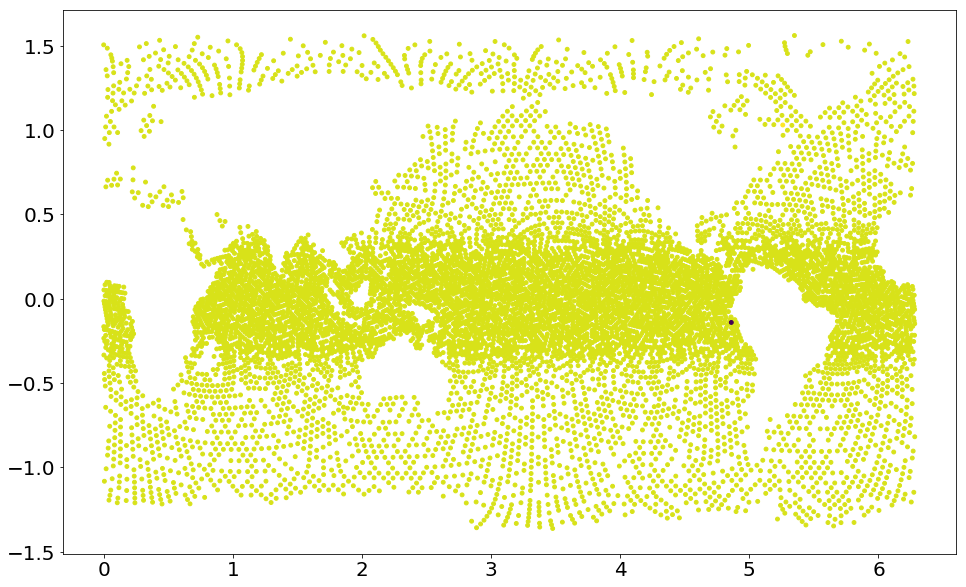

In [161]:
plt.scatter(dsM.lonCell[:10010].values,dsM.latCell[:10010].values,s=15,c=ds.timeMonthly_avg_shortWaveHeatFlux[3,:10010].values)